In [27]:
from time import time

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [28]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [29]:
BATCH_SIZE = 32
IMG_HEIGHT = 64
IMG_WIDTH = 64
EPOCHS = 25
DATASET_VALIDATION_SPLIT = 0.2
DATASET_PATH = ".\qualitycontrol"
MODEL_PATH = "anomaly_detection_model"

In [30]:
TRAIN_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATASET_PATH,
  validation_split=DATASET_VALIDATION_SPLIT,
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

VALIDATION_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATASET_PATH,
  validation_split=DATASET_VALIDATION_SPLIT,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

CLASS_NAMES = TRAIN_DATASET.class_names

Found 486 files belonging to 2 classes.


Using 389 files for training.
Found 486 files belonging to 2 classes.
Using 97 files for validation.


In [31]:
CLASS_NAMES

['correct', 'defective']

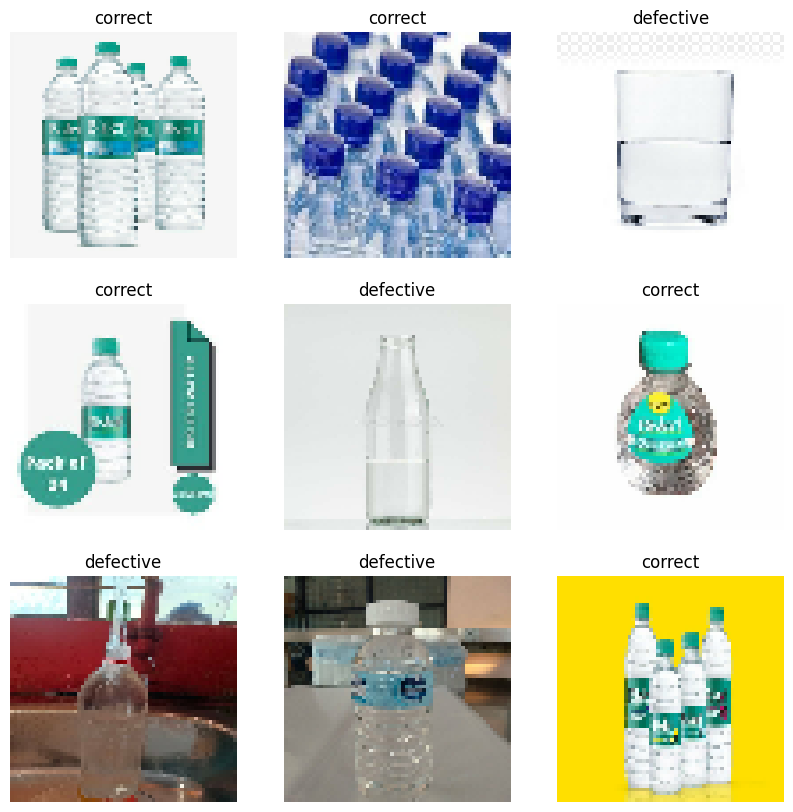

In [32]:
plt.figure(figsize=(10, 10))
for images, labels in TRAIN_DATASET.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASS_NAMES[labels[i]])
    plt.axis("off")

In [33]:
TRAIN_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATASET_PATH,
  validation_split=DATASET_VALIDATION_SPLIT,
  subset="training",
  color_mode="rgb",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

VALIDATION_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATASET_PATH,
  validation_split=DATASET_VALIDATION_SPLIT,
  subset="validation",
  color_mode="rgb",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 486 files belonging to 2 classes.
Using 389 files for training.
Found 486 files belonging to 2 classes.
Using 97 files for validation.


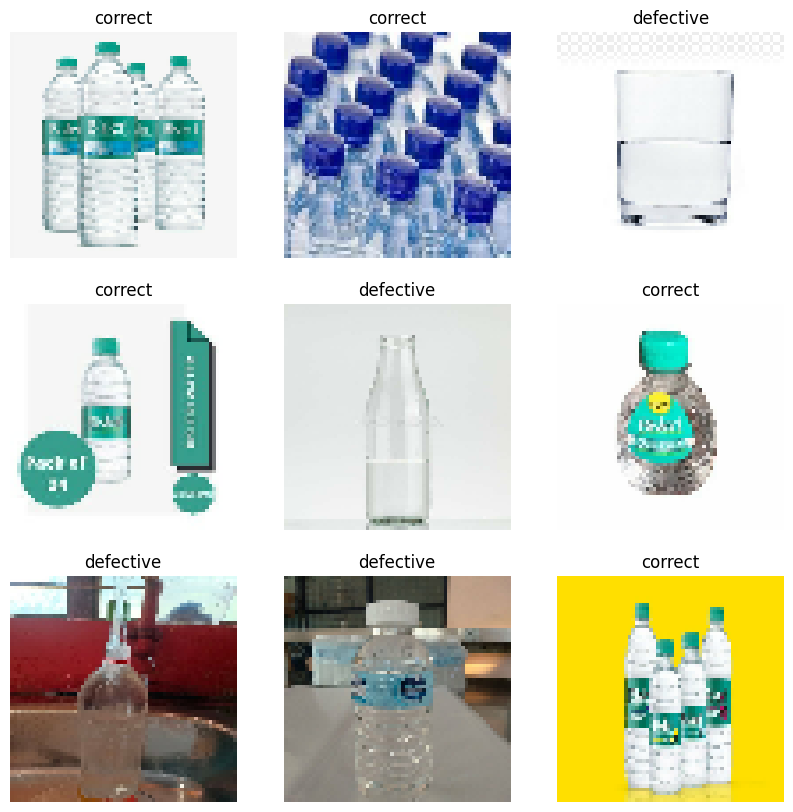

In [34]:
plt.figure(figsize=(10, 10))
for images, labels in TRAIN_DATASET.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASS_NAMES[labels[i]])
    plt.axis("off")

In [39]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Use 3 for RGB channels
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(len(CLASS_NAMES))  # Ensure the output layer matches the number of classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
start = time()

history = model.fit(
  TRAIN_DATASET,
  validation_data=VALIDATION_DATASET,
  epochs=EPOCHS
)

end = time()

elapsed_time = end - start

final_results = {
  "dataset": "RGB",
  "total_parameters": model.count_params(),
  "elapsed_time": elapsed_time,
  "accuracy": history.history["val_accuracy"][-1]
}

Epoch 1/25


13/13 [==============================] - 3s 95ms/step - loss: 0.6181 - accuracy: 0.6452 - val_loss: 0.6116 - val_accuracy: 0.6392
Epoch 2/25
13/13 [==============================] - 2s 81ms/step - loss: 0.5596 - accuracy: 0.7121 - val_loss: 0.5646 - val_accuracy: 0.6907
Epoch 3/25
13/13 [==============================] - 2s 80ms/step - loss: 0.5072 - accuracy: 0.7378 - val_loss: 0.5126 - val_accuracy: 0.7320
Epoch 4/25
13/13 [==============================] - 2s 79ms/step - loss: 0.4886 - accuracy: 0.7558 - val_loss: 0.5004 - val_accuracy: 0.7423
Epoch 5/25
13/13 [==============================] - 2s 81ms/step - loss: 0.4501 - accuracy: 0.7789 - val_loss: 0.4618 - val_accuracy: 0.7629
Epoch 6/25
13/13 [==============================] - 2s 82ms/step - loss: 0.4131 - accuracy: 0.8072 - val_loss: 0.5122 - val_accuracy: 0.7010
Epoch 7/25
13/13 [==============================] - 2s 81ms/step - loss: 0.3929 - accuracy: 0.8098 - val_loss: 0.5368 - val_accuracy: 0.7423
Epoch 8/25
13/13 [======

In [41]:
print(f"Dataset Type: {final_results['dataset']}")
print(f"Total number of parameters: {final_results['total_parameters']}")
print(f"Elapsed Time: {final_results['elapsed_time']:.0f} seconds")
print(f"Final Accuracy: {final_results['accuracy']*100:.2f}%")

Dataset Type: RGB
Total number of parameters: 548258
Elapsed Time: 43 seconds
Final Accuracy: 82.47%


In [44]:
model.save(MODEL_PATH)

INFO:tensorflow:Assets written to: anomaly_detection_model\assets


INFO:tensorflow:Assets written to: anomaly_detection_model\assets


In [45]:
model.save(f"{MODEL_PATH}.h5")